In [1]:
!pip install scikit-image

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import cv2
img_path = '/content/drive/MyDrive/SOC_2025/week3/example_images/image001_lesion.png'
img = cv2.imread(img_path)

In [4]:
blurred = cv2.GaussianBlur(img, (5,5), 0)

In [6]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
enhanced = clahe.apply(img_gray)

In [7]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
red_channel = img[:,:,2]
_, thresh_red = cv2.threshold(red_channel, 50, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

In [8]:
img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2Lab)
l_channel = img_lab[:,:,0]
_, thresh_exudates = cv2.threshold(l_channel, 200, 255, cv2.THRESH_BINARY)

In [9]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
exudate_refined = cv2.morphologyEx(thresh_exudates, cv2.MORPH_CLOSE, kernel)

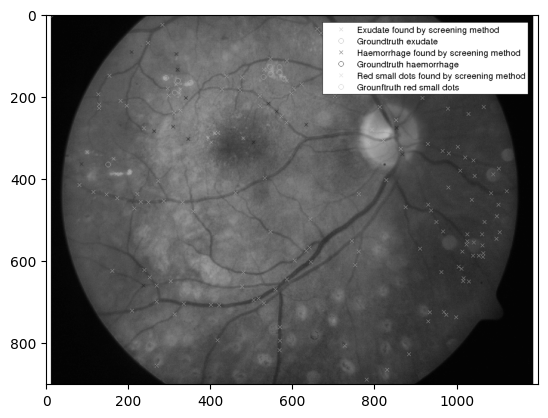

In [10]:
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(enhanced, cv2.COLOR_GRAY2RGB))
plt.show()